In [6]:
import math
from bisect import bisect_left
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
import numpy as np

In [7]:
file = open("../data/final.txt")
data = []
for num in file:
    data.append(int(num))
n = len(data)
data = np.array(data)
%store data
%store n

Stored 'data' (ndarray)
Stored 'n' (int)


In [72]:
data.sort()
statistical = Counter(data)
data_2 = [statistical.keys(), statistical.values()]
print(*data)
print(tabulate(data_2, tablefmt="grid"))

7 8 8 8 8 9 9 9 9 9 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 20 20 20 20 20 21 22
+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+
| 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 |
+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+
| 1 | 4 | 5 |  5 | 13 | 10 | 14 |  9 |  8 |  9 | 10 | 10 |  5 |  5 |  1 |  1 |
+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+


In [70]:
R = data[-1] - data[0]
k = (1 + math.log2(n))
h = round(R / k)
k = round(k)
intervals = [[data[0], data[0] + h]]
intervals_count = [0]
mid_intervals = [(2 * data[0] + h) / 2]
for nums, count in statistical.items():
    if intervals[-1][-1] <= nums:
        intervals.append([nums, nums + h])
        mid_intervals.append((2 * nums + h) / 2)
        intervals_count.append(count)
    else:
        intervals_count[-1] += count
rate = [intervals, intervals_count]
rate_pref = []
relative_rate = []
relative_rate_pref = []
for num in intervals_count:
    relative_rate.append(num / n)
    if len(rate_pref) == 0:
        rate_pref.append(num)
        relative_rate_pref.append(relative_rate[-1])
    else:
        relative_rate_pref.append(relative_rate[-1] + relative_rate_pref[-1])
        rate_pref.append(num + rate_pref[-1])

In [71]:
print(tabulate(rate, tablefmt="grid"))

+--------+---------+----------+----------+----------+----------+----------+----------+
| [7, 9] | [9, 11] | [11, 13] | [13, 15] | [15, 17] | [17, 19] | [19, 21] | [21, 23] |
+--------+---------+----------+----------+----------+----------+----------+----------+
| 5      | 10      | 23       | 23       | 17       | 20       | 10       | 2        |
+--------+---------+----------+----------+----------+----------+----------+----------+


In [47]:
data_3 = pd.DataFrame({"Границы интервалов" : [f'{start} - {end}' for start, end  in intervals],
                       "Середина интервала" : mid_intervals,
                       "Частота" : intervals_count,
                       "Накопленная частота" : rate_pref,
                       "Относительная частота" : relative_rate,
                       "Накопительная относительная частота" : relative_rate_pref
                       })
pd.set_option('display.max_rows', None)  # Отображать все строки
pd.set_option('display.max_columns', None)  # Отображать все столбцы
pd.set_option('display.expand_frame_repr', False)  # Отключаем перенос таблицы на новую строку
print(data_3)

  Границы интервалов  Середина интервала  Частота  Накопленная частота  Относительная частота  Накопительная относительная частота
0              7 - 9                 8.0        5                    5               0.045455                             0.045455
1             9 - 11                10.0       10                   15               0.090909                             0.136364
2            11 - 13                12.0       23                   38               0.209091                             0.345455
3            13 - 15                14.0       23                   61               0.209091                             0.554545
4            15 - 17                16.0       17                   78               0.154545                             0.709091
5            17 - 19                18.0       20                   98               0.181818                             0.890909
6            19 - 21                20.0       10                  108             

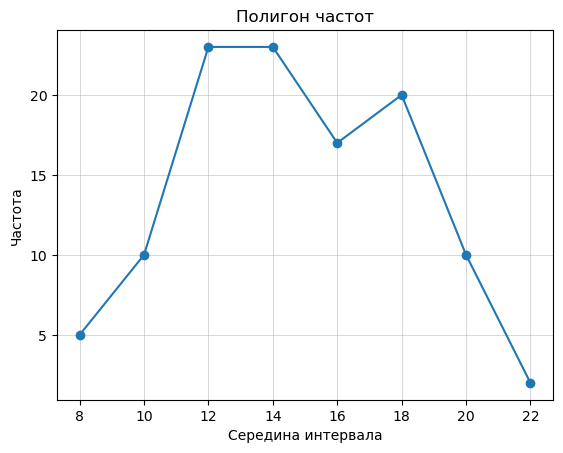

<Figure size 640x480 with 0 Axes>

In [59]:
plt.plot(mid_intervals,intervals_count, marker='o')
plt.grid(linestyle="-",linewidth=0.5, alpha=0.7)
plt.title('Полигон частот')
plt.xlabel('Середина интервала')
plt.ylabel('Частота')
plt.show()
plt.clf()

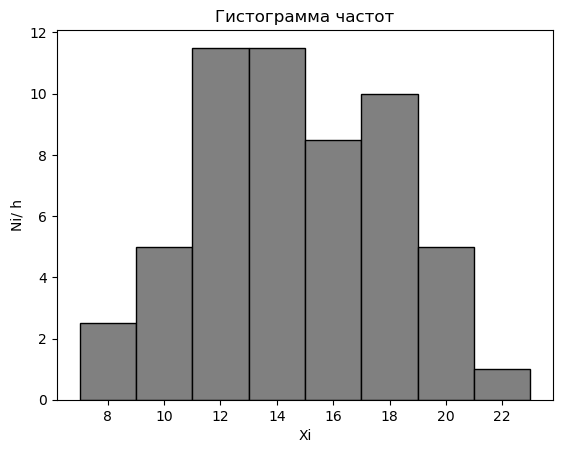

<Figure size 640x480 with 0 Axes>

In [60]:
widths = [segment[1] - segment[0] for segment in intervals]
x = [segment[0] for segment in intervals]
y = [num / h for num in intervals_count]
plt.bar(x, y, width=widths, color='gray', edgecolor='black', align="edge")
plt.title("Гистограмма частот")
plt.ylabel("Ni/ h")
plt.xlabel("Xi")
plt.show()
plt.clf()

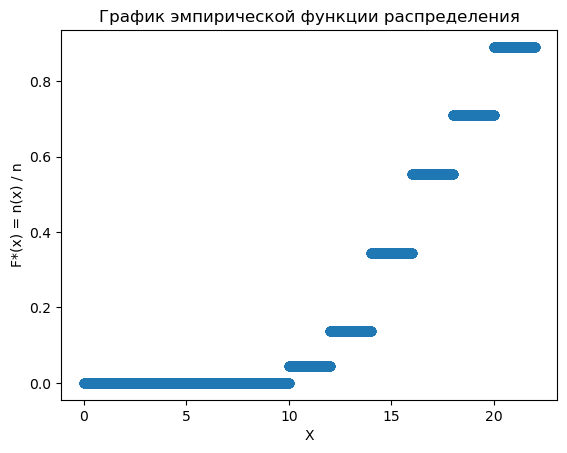

<Figure size 640x480 with 0 Axes>

In [61]:
data_5_x = np.linspace(0, data[-1], 10000)
relative_rate_pref = [0] + relative_rate_pref
data_5_y = [relative_rate_pref[bisect_left(mid_intervals, num)] for num in data_5_x]
plt.plot(data_5_x,data_5_y, marker="o", linestyle='None')
plt.title("График эмпирической функции распределения")
plt.xlabel("X")
plt.ylabel("F*(x) = n(x) / n")
plt.show()
plt.clf()

In [62]:
mod = []
max_element = max(intervals_count)
for i in range(len(intervals_count)):
    if intervals_count[i] == max_element:
        mod.append(i)
X_mod = []
for idx in mod:
    ans = (intervals[idx][0] + h * (intervals_count[idx] - intervals_count[idx - 1]) /
           ((intervals_count[idx] - intervals_count[idx - 1]) + (intervals_count[idx] - intervals_count[idx + 1])))
    X_mod.append(ans)
print("Мода: ",X_mod)

Мода:  [13.0, 13.0]


In [63]:
X_med1 = [data[n//2], data[n//2 + 1]]
med = -1
for i in range(len(rate_pref)):
    if rate_pref[i] > rate_pref[-1] // 2:
        med = i
        break
X_med2 = intervals[med][0] + h * (n / 2 - rate_pref[med - 1]) / intervals_count[med]
print("Медианы:", X_med1, X_med2)

Медианы: [14, 14] 14.478260869565217


In [64]:
X_mid_var = sum(data) / n
X_mid_stat = sum([num * count for num, count in statistical.items()]) / n
X_mid_eq_point = sum([mid_intervals[i] * intervals_count[i] for i in range(len(mid_intervals))]) / n
print("Арифмитическое(выборочное) среднее:", X_mid_var, X_mid_stat, X_mid_eq_point)


Арифмитическое(выборочное) среднее: 14.154545454545454 14.154545454545454 14.672727272727272


In [65]:
D_stat = sum([(num - X_mid_stat) ** 2 for num in data]) / n
D_eq_point = sum([(mid_intervals[i] - X_mid_eq_point) ** 2 * intervals_count[i] for i in range(len(mid_intervals))]) / n
print("Дисперсия:",D_stat, D_eq_point)

Дисперсия: 11.621570247933883 11.438347107438016


In [66]:
u3 = sum([(mid_intervals[i] - X_mid_eq_point) ** 3 * intervals_count[i] for i in range(len(mid_intervals))]) / n
u4 = sum([(mid_intervals[i] - X_mid_eq_point) ** 4 * intervals_count[i] for i in range(len(mid_intervals))]) / n
print("Центральный выборочный момент порядка 3 и 4:", u3, u4)

Центральный выборочный момент порядка 3 и 4: 1.119975957926398 292.55843147326


In [67]:
d = math.sqrt(D_eq_point)
As = u3 / (d ** 3)
Ek = u4 / (d ** 4) - 3

print("средне квадратичное отклонение:", d)
print("Выборочный коэффициент асимметрии:", As)
print("Выборочный коэффициент эксцесса:", Ek)



средне квадратичное отклонение: 3.382062552265705
Выборочный коэффициент асимметрии: 0.02895101489062734
Выборочный коэффициент эксцесса: -0.7639264939713075
